___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [8]:
df.info() #majority of the cols are object -> convert to dummies later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [178]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure Cohort       0
dtype: int64

In [15]:
df['Churn'].value_counts() 
#the inbalance might make the model not performing, one can add class weight, resampling of the less common class

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

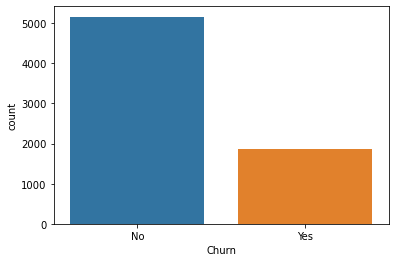

In [18]:
sns.countplot(x='Churn',data=df)

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

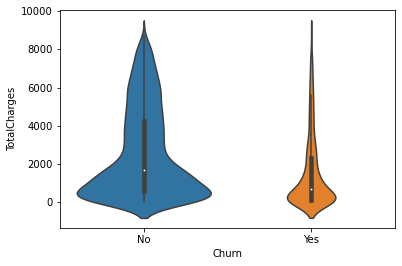

In [30]:
sns.violinplot(x='Churn',y='TotalCharges',data=df, scale='count')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

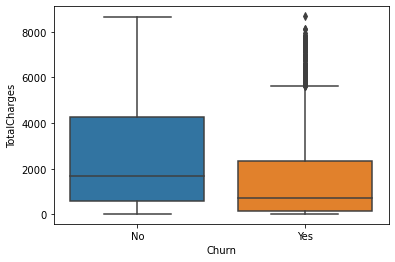

In [21]:
sns.boxplot(x='Churn',y='TotalCharges',data=df)

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

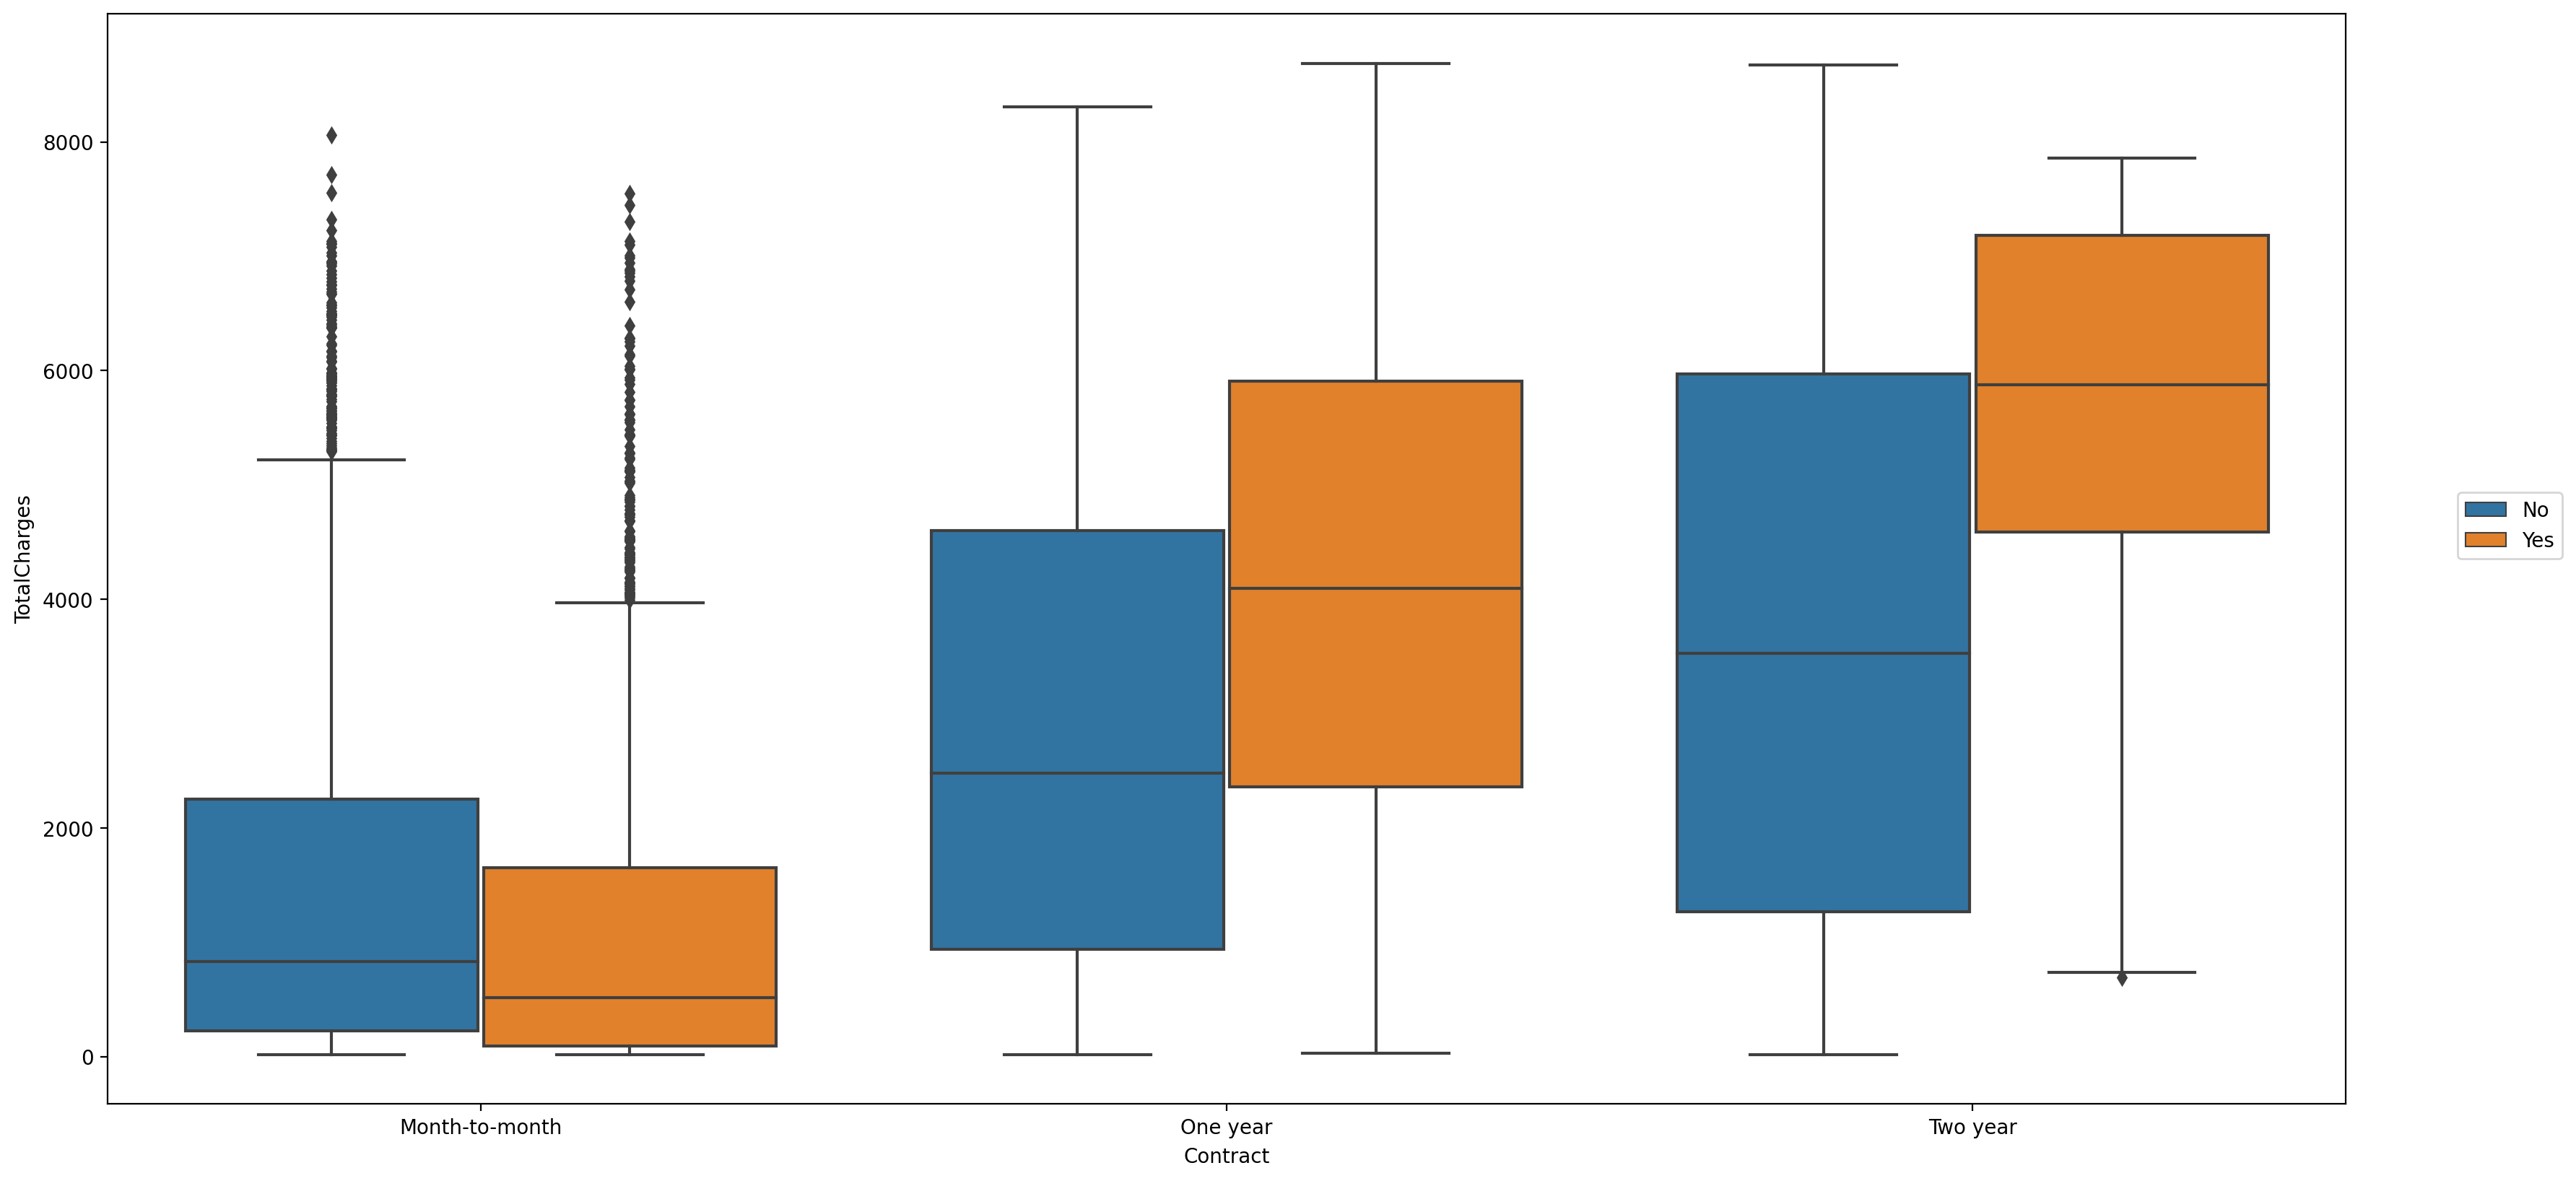

In [182]:
plt.figure(figsize=(20,10),dpi=200)
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn')
plt.legend(loc=(1.05,0.5))
#people who did churn in One Year Contract and Two year actually paid more 
#after 1-2 year, people are more likely to churn if they pay more 

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

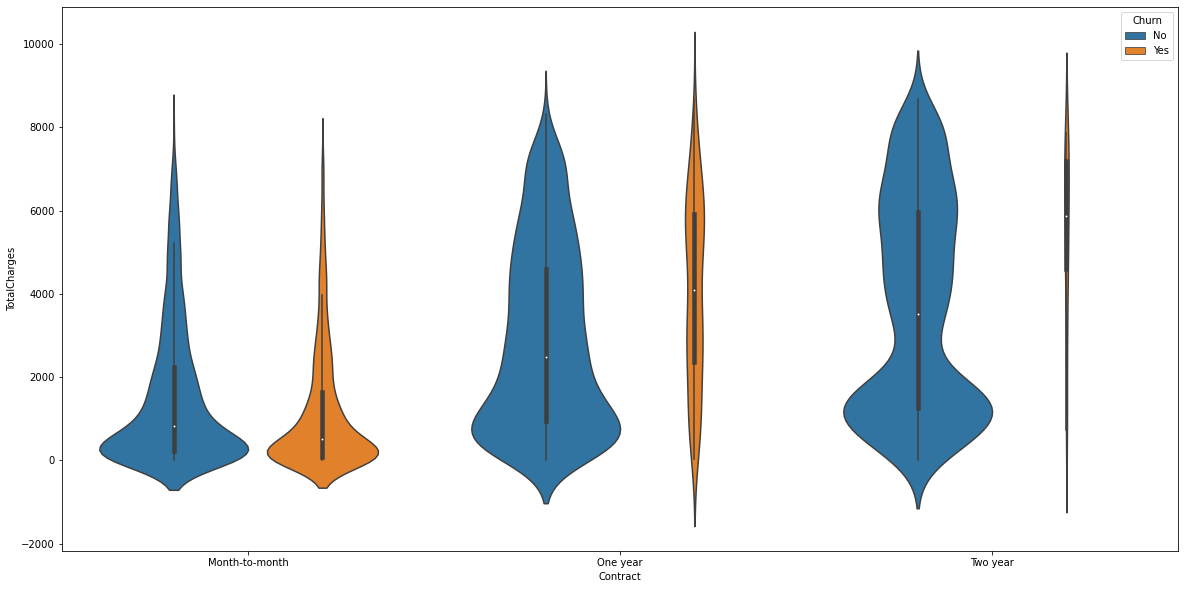

In [36]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Contract',y='TotalCharges',data=df, hue='Churn',scale='count')

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [4]:
df_sub=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]
df_sub.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport InternetService  \
0             No          Yes               No          No             DSL   
1            Yes           No              Yes          No             DSL   
2            Yes          Yes               No          No             DSL   
3            Yes           No              Yes         Yes             DSL   
4             No           No               No          No     Fiber optic   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod Churn  
0           Electronic check    No  
1               Mailed check    No  
2               Mailed check   Yes  
3  Bank transfer (automatic)    No  
4           Electronic check   Yes

In [183]:
df_object = df_sub.select_dtypes(include='object')
df_numeric = df_sub.select_dtypes(exclude='object')
df_obj_dummy=pd.get_dummies(df_object, drop_first=True)
new_df_sub=pd.concat([df_numeric,df_obj_dummy],axis=1)

#alternative way 
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [18]:
df_sub_coef_=new_df_sub.corr()['Churn_Yes'].sort_values().drop('Churn_Yes')
df_sub_coef_

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


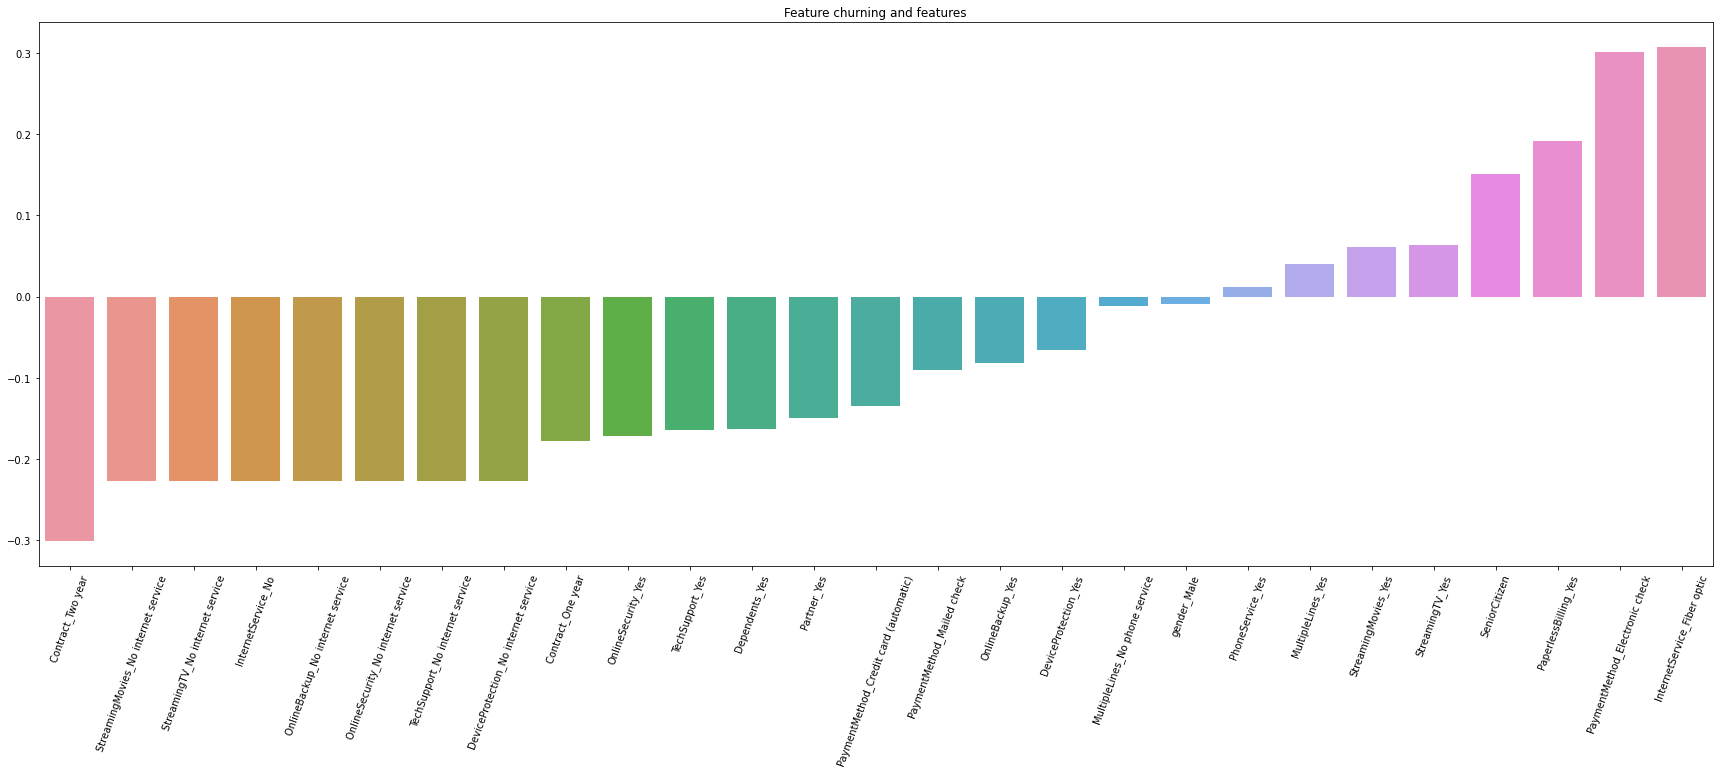

In [184]:
plt.figure(figsize=(30,10))
plt.title('Feature churning and features')
sns.barplot(x=df_sub_coef_.index, y=df_sub_coef_.values)
plt.xticks(rotation = 70)
plt.show()

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [34]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

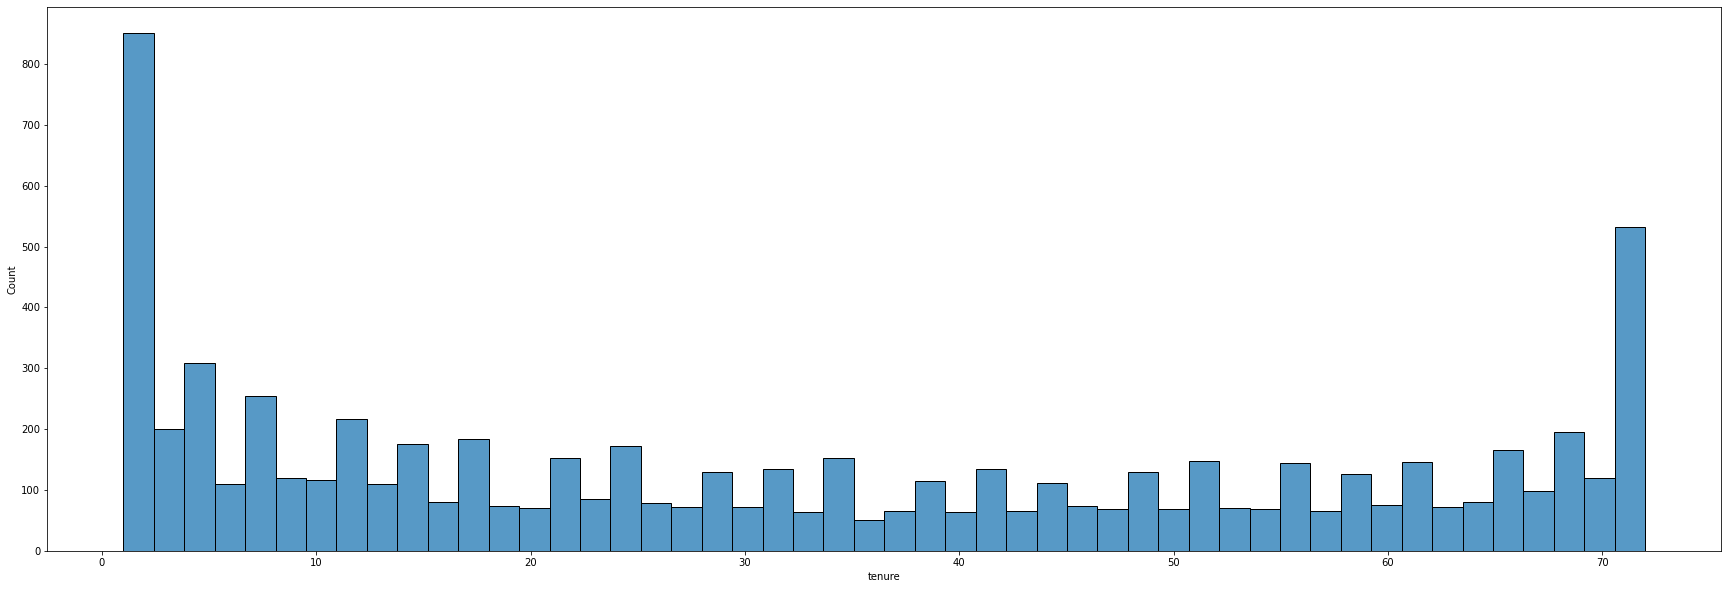

In [40]:
plt.figure(figsize=(30,10))
sns.histplot(x='tenure',data=df,bins=50)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 2160x720 with 0 Axes>

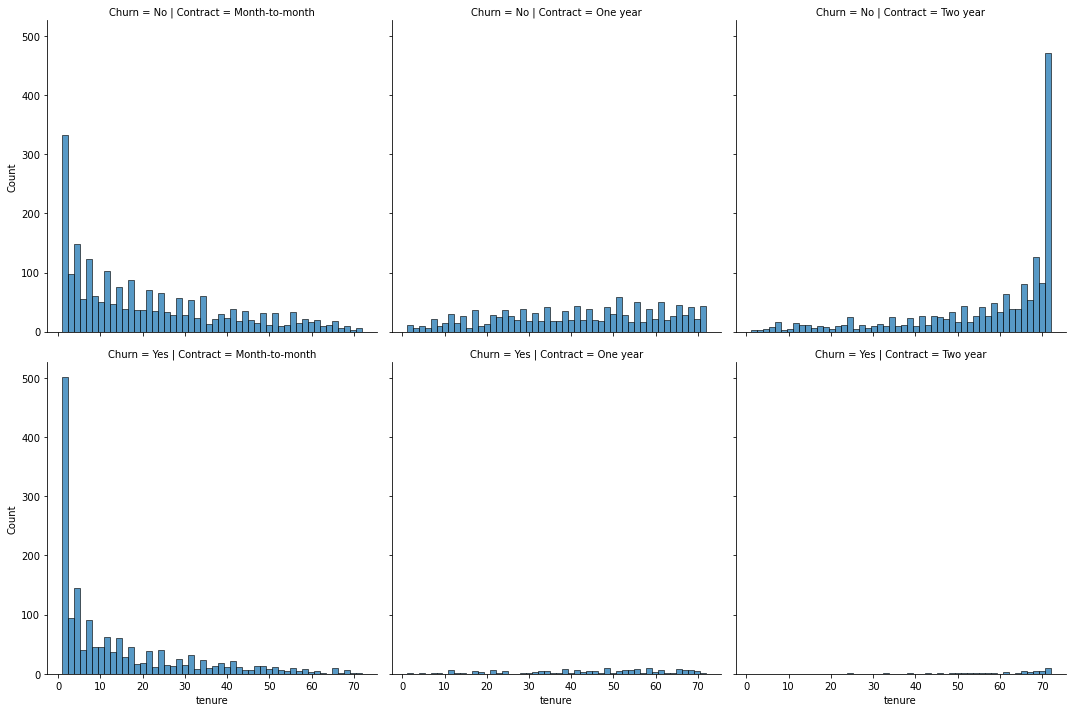

In [186]:
plt.figure(figsize=(30,10))
sns.displot(x='tenure',data=df,bins=50,col='Contract',row='Churn')
plt.show()

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

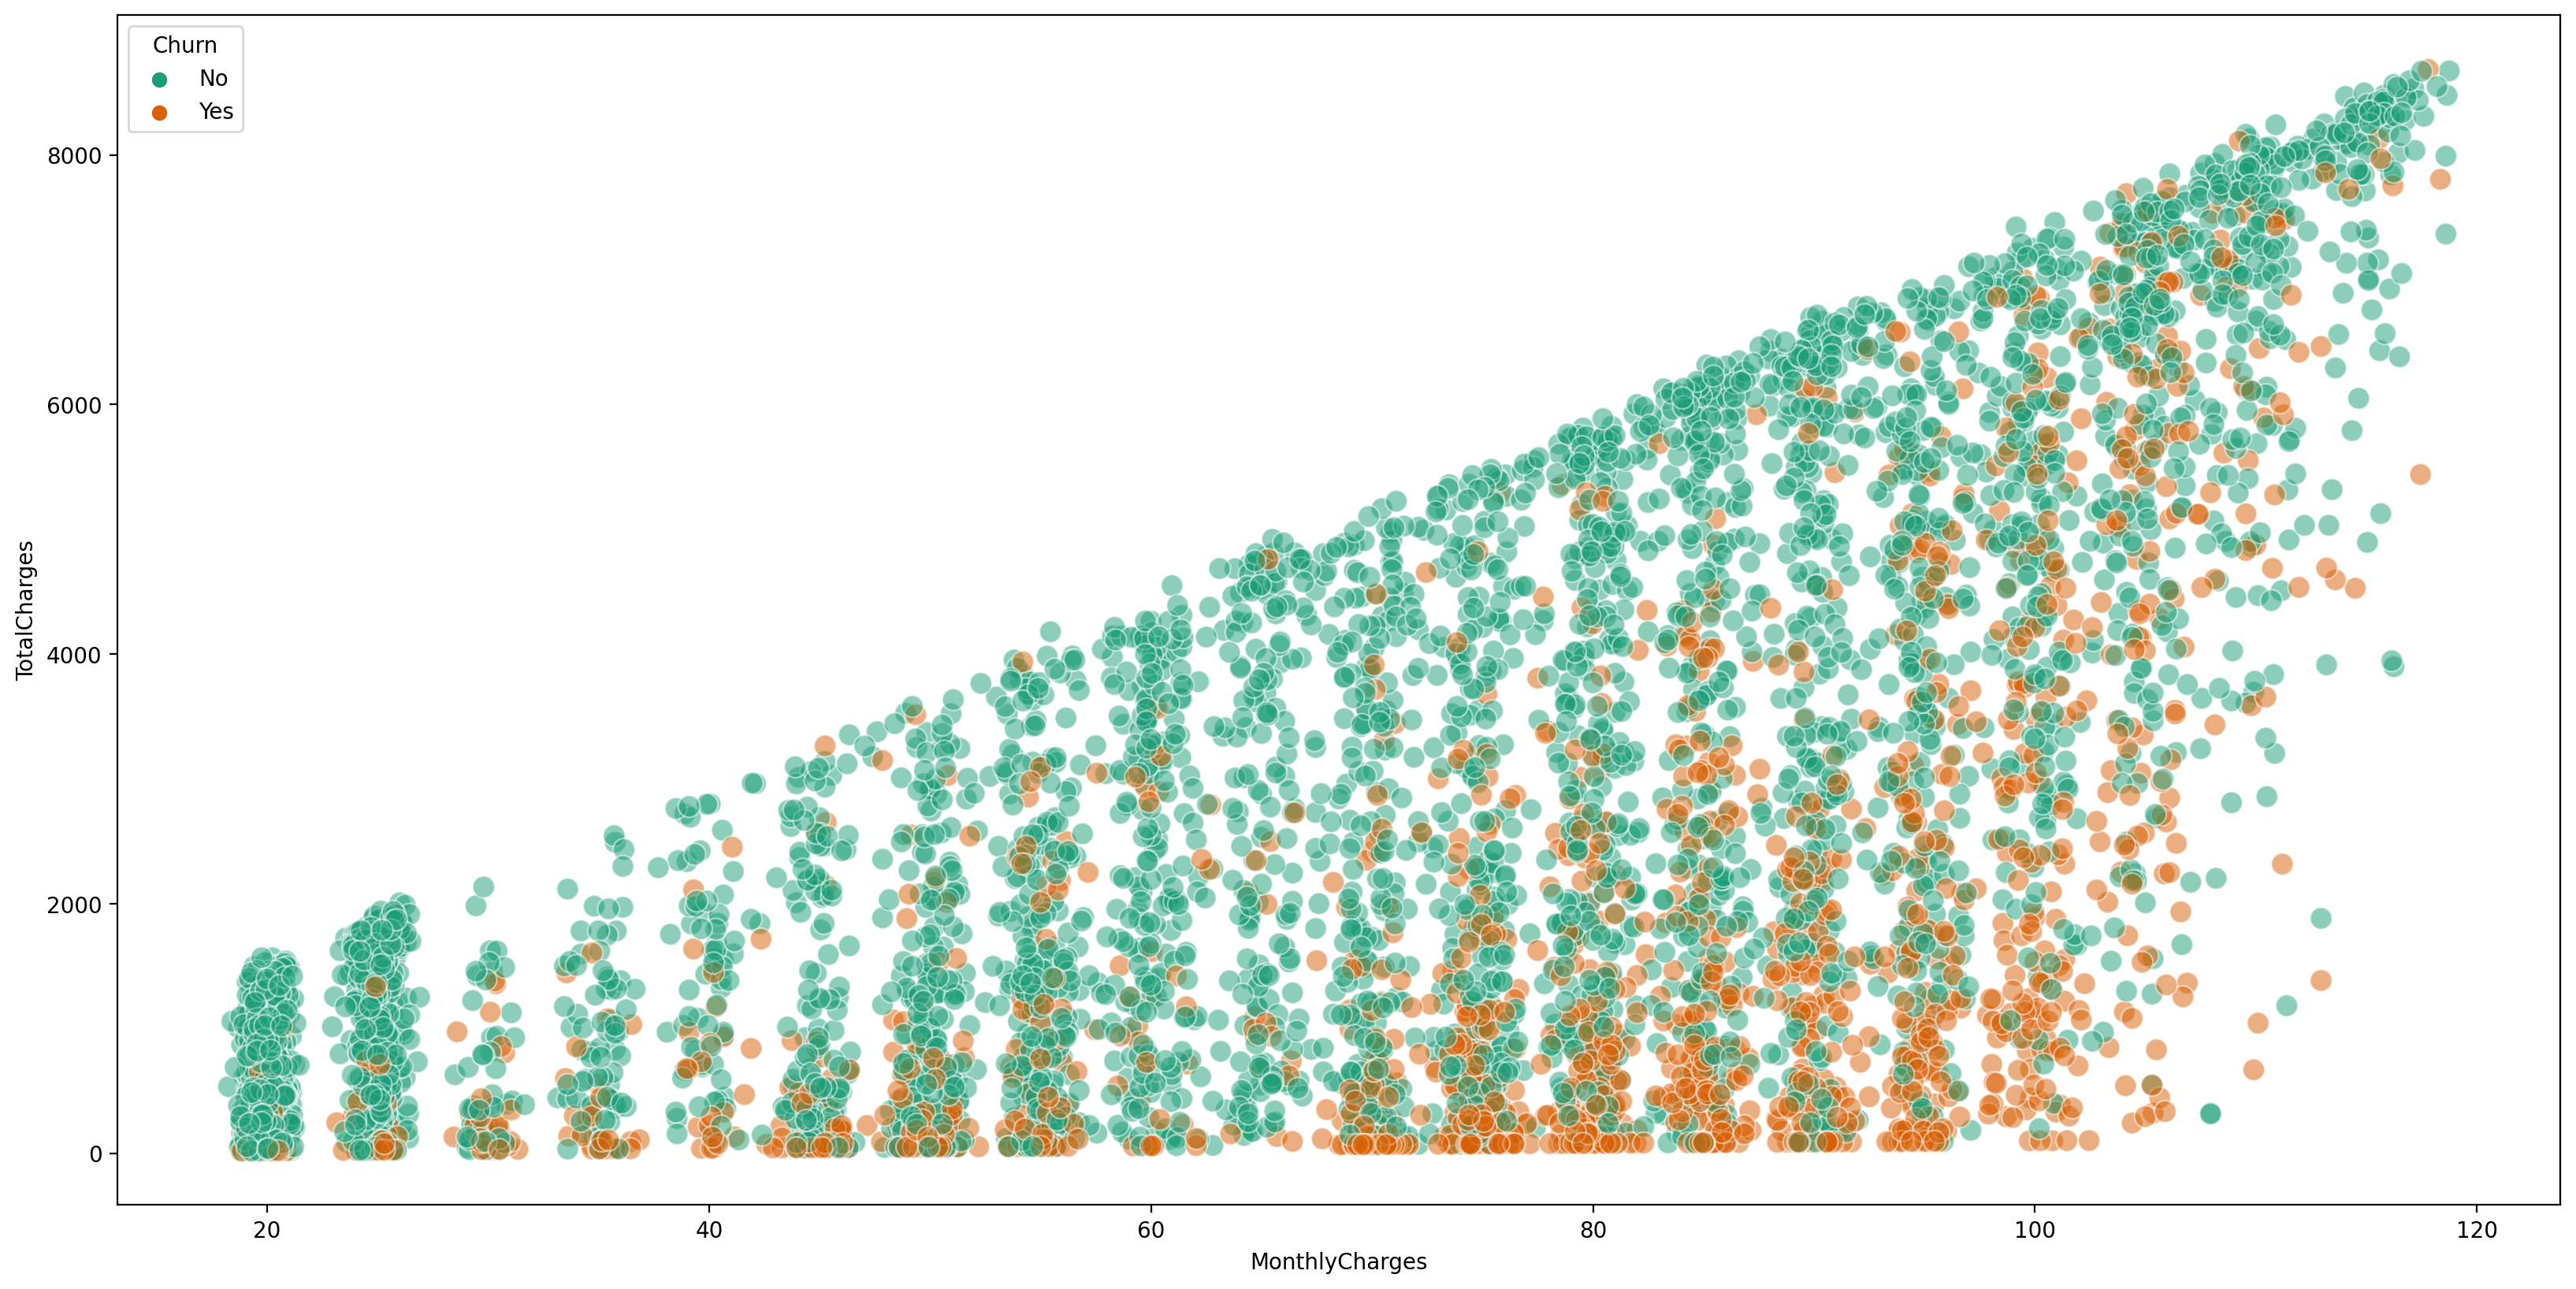

In [192]:
plt.figure(figsize=(20,10),dpi=200)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',alpha=0.5,s=100,palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [197]:
#Way1
#tenure_churn = df[df['Churn']=='Yes'].groupby('tenure').count().iloc[:,1]
#tenure_active = df[df['Churn']=='No'].groupby('tenure').count().iloc[:,1]
#tenure_churn_rate=tenure_churn*100/(tenure_churn+tenure_active)
#tenure_churn_rate

#Way2
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [196]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']

In [198]:
churn_rate=100*yes_churn/(yes_churn+no_churn)

<AxesSubplot:xlabel='tenure'>

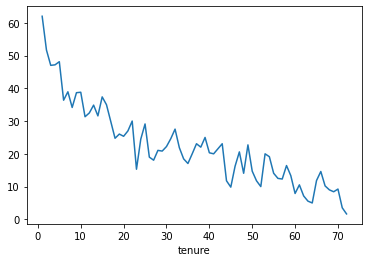

In [201]:
churn_rate.transpose()['customerID'].plot()

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

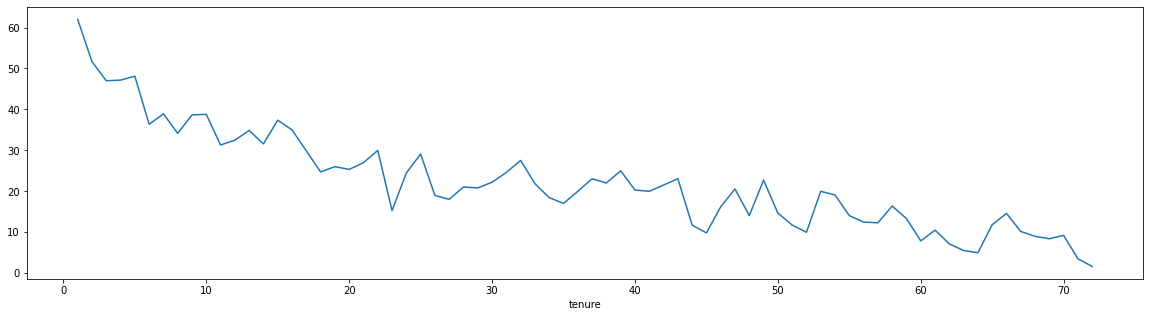

In [80]:
plt.figure(figsize=(20,5))
sns.lineplot(x=tenure_churn_rate.index,y=tenure_churn_rate.values)
xlabel='tenure'
ylabel='churn percentage'

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [82]:
#way1
df['Tenure Cohort'] = np.where(df['tenure']<=12, '0-12 Months',
                              np.where(df['tenure']<=24, '12-24 Months',
                                      np.where(df['tenure']<=48,'24-48 Months','Over 48 Months')))

In [203]:
#way2
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure <49:
        return '24-48 Months'
    else: 
        return 'Over 48 Months'

In [96]:
df[['tenure','Tenure Cohort']].head(10)

tenure   Tenure Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

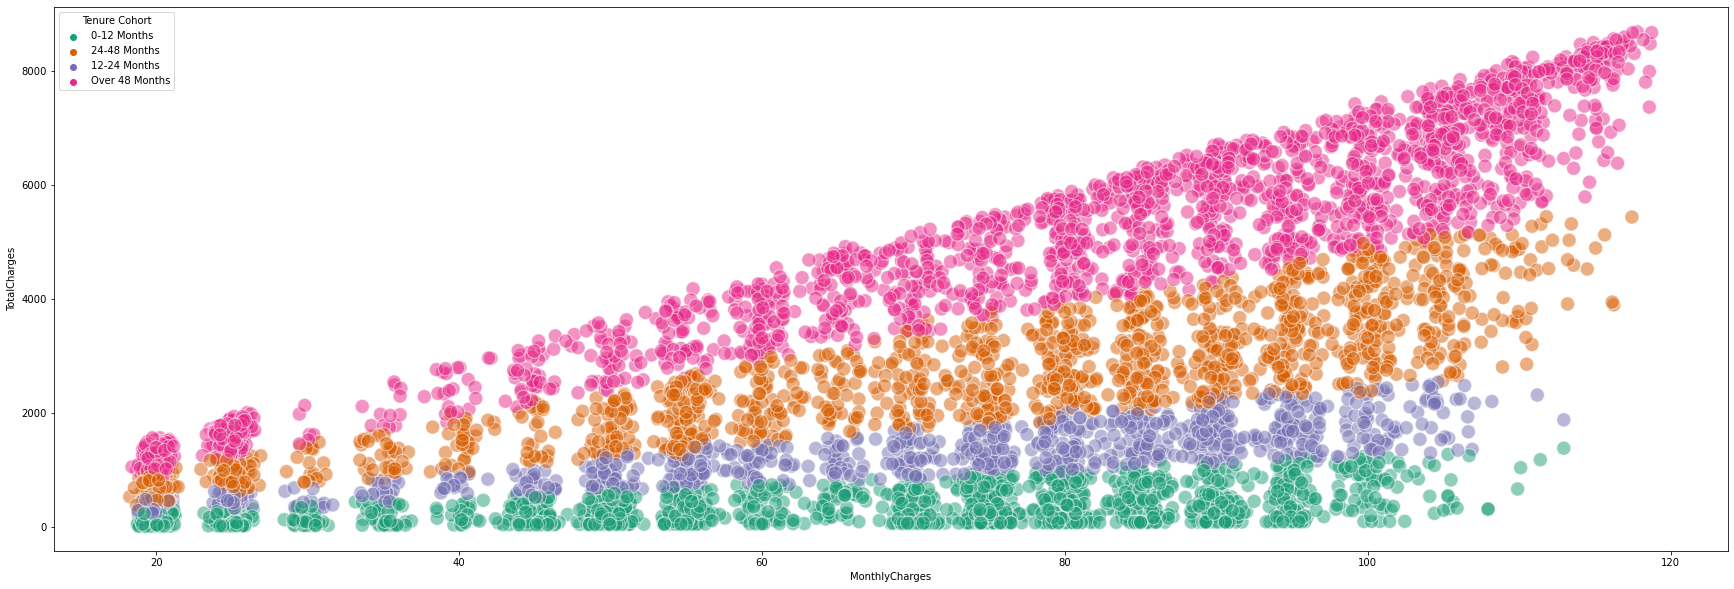

In [210]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Tenure Cohort',alpha=0.5,s=200,palette='Dark2')

**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

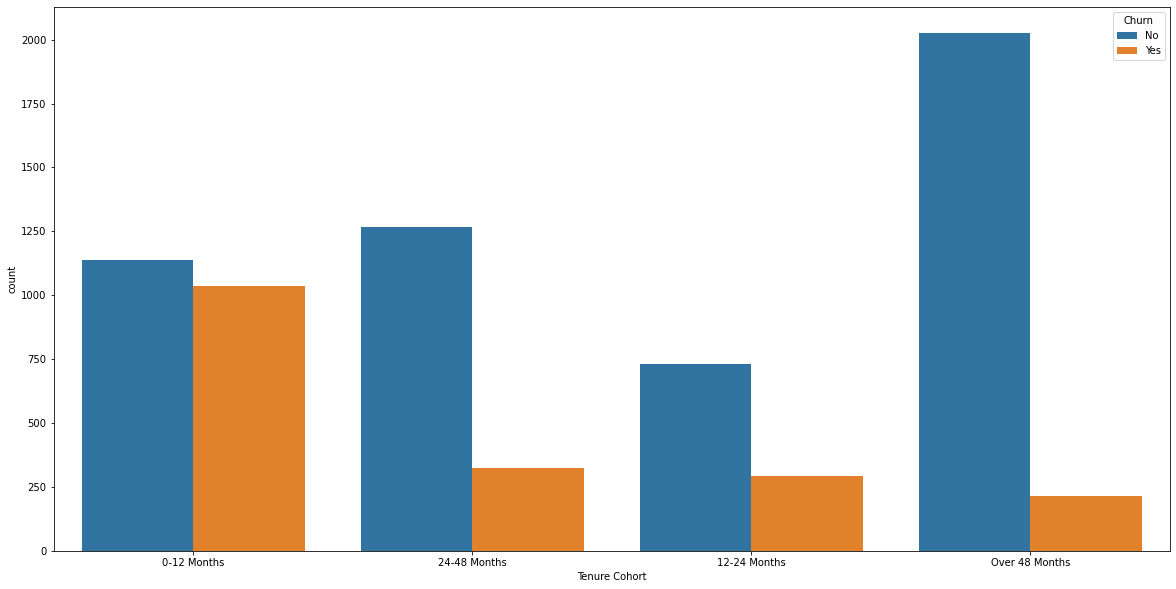

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(x='Tenure Cohort',data=df,hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

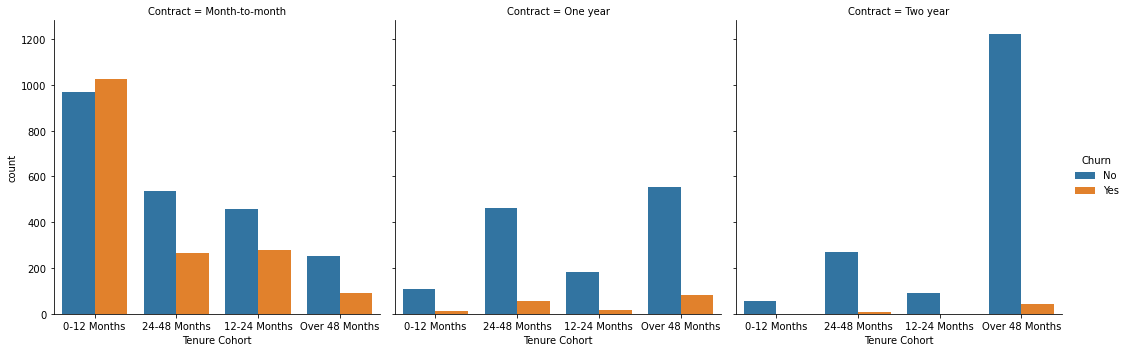

In [211]:
sns.catplot(data=df, x='Tenure Cohort',hue='Churn',kind='count',col='Contract')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [7]:
X=df.drop(['Churn','customerID'], axis=1)

In [8]:
X=pd.get_dummies(new_df,drop_first=True)

In [9]:
y=df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=101)

In [74]:
#model 1 simple tree 
tree=DecisionTreeClassifier()
tree_2=DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [69]:
#model 2 CV
tree_param_grid = {
              'max_depth':[5,6,7],
              'max_leaf_nodes':[3,4,5],
              'criterion':['gini','entropy'],
              'splitter':['best','random']
             }

grid=GridSearchCV(tree,tree_param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7], 'max_leaf_nodes': [3, 4, 5],
                         'splitter': ['best', 'random']})

In [70]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 3, 'splitter': 'best'}

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [75]:
pred_tree = tree.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_cv = grid.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

          No       0.85      0.77      0.81       557
         Yes       0.36      0.50      0.42       147

    accuracy                           0.71       704
   macro avg       0.61      0.63      0.61       704
weighted avg       0.75      0.71      0.73       704



In [76]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,pred_tree_2))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [77]:
print(classification_report(y_test,pred_tree_cv))

              precision    recall  f1-score   support

          No       0.84      0.94      0.89       557
         Yes       0.60      0.34      0.43       147

    accuracy                           0.81       704
   macro avg       0.72      0.64      0.66       704
weighted avg       0.79      0.81      0.79       704



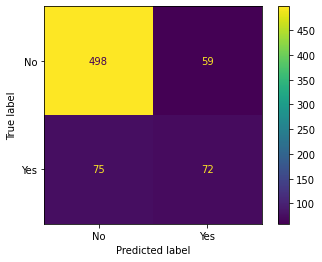

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_tree_2)

In [20]:
feature_coef_=pd.DataFrame({'feature':X.columns,'imp':tree.feature_importances_})
#alternative
#imp_feats = pd.DataFrame(data=tree.feature_importances_, index=X.columns, columns=['Feature imp'])

In [21]:
feature_coef_=feature_coef_.sort_values('imp')

In [23]:
feature_coef_ = feature_coef_[feature_coef_['imp']>0]

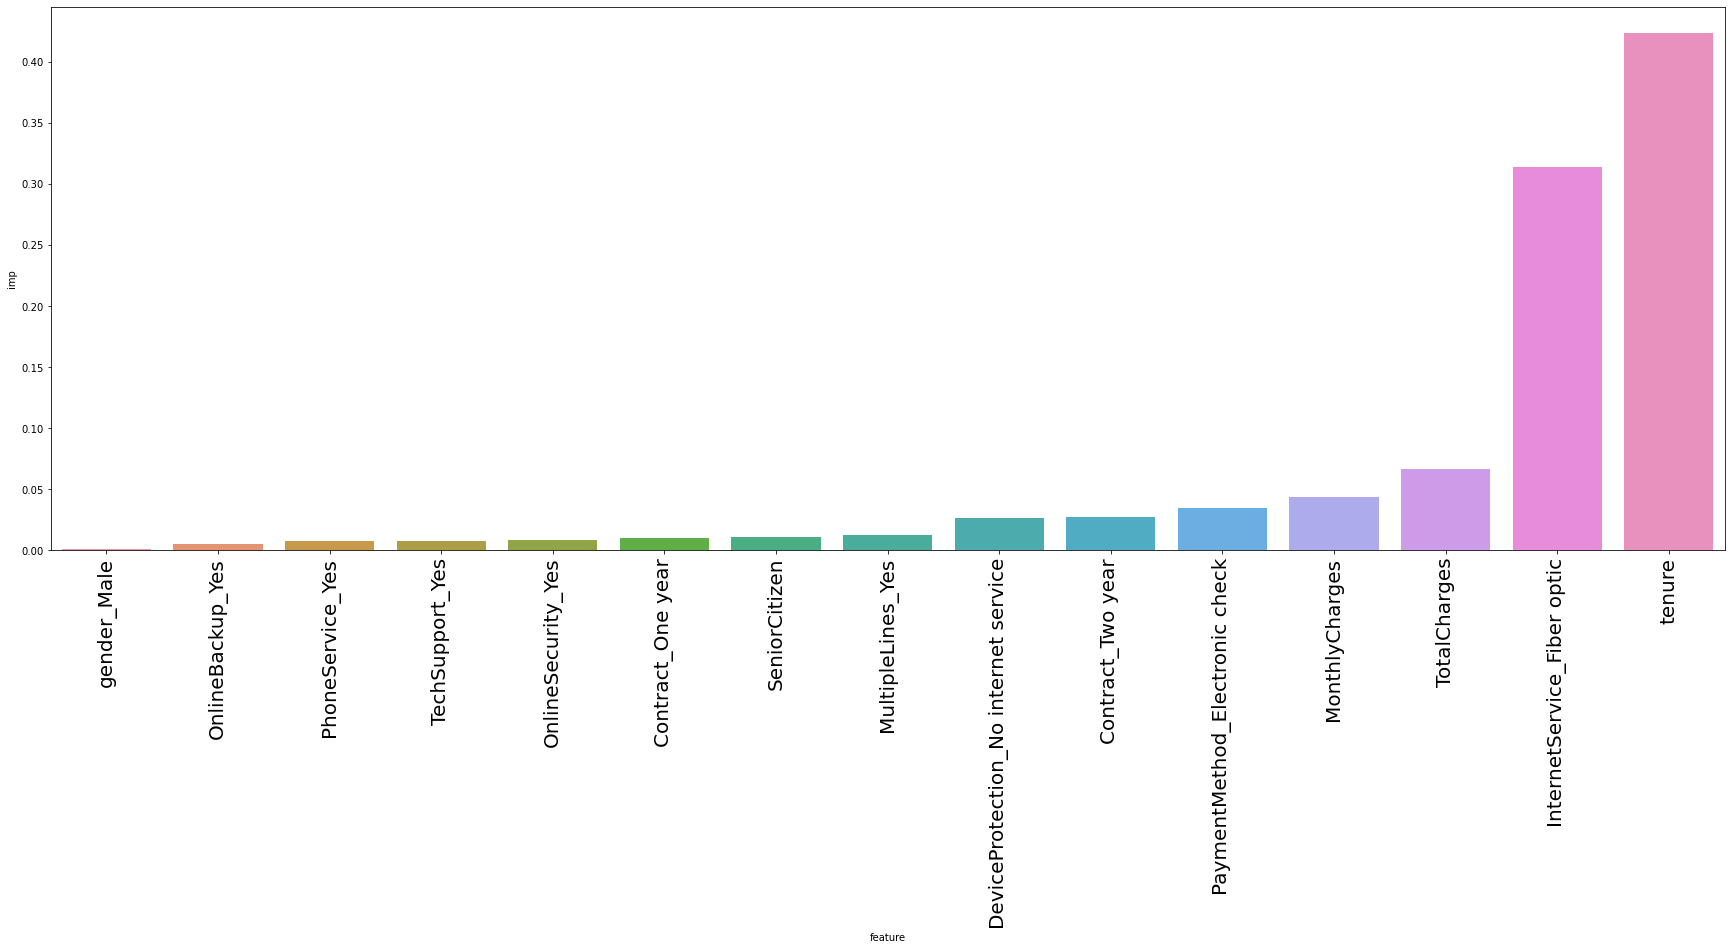

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x='feature',y='imp',data=feature_coef_)
plt.xticks(rotation=90,size=20)
plt.show()

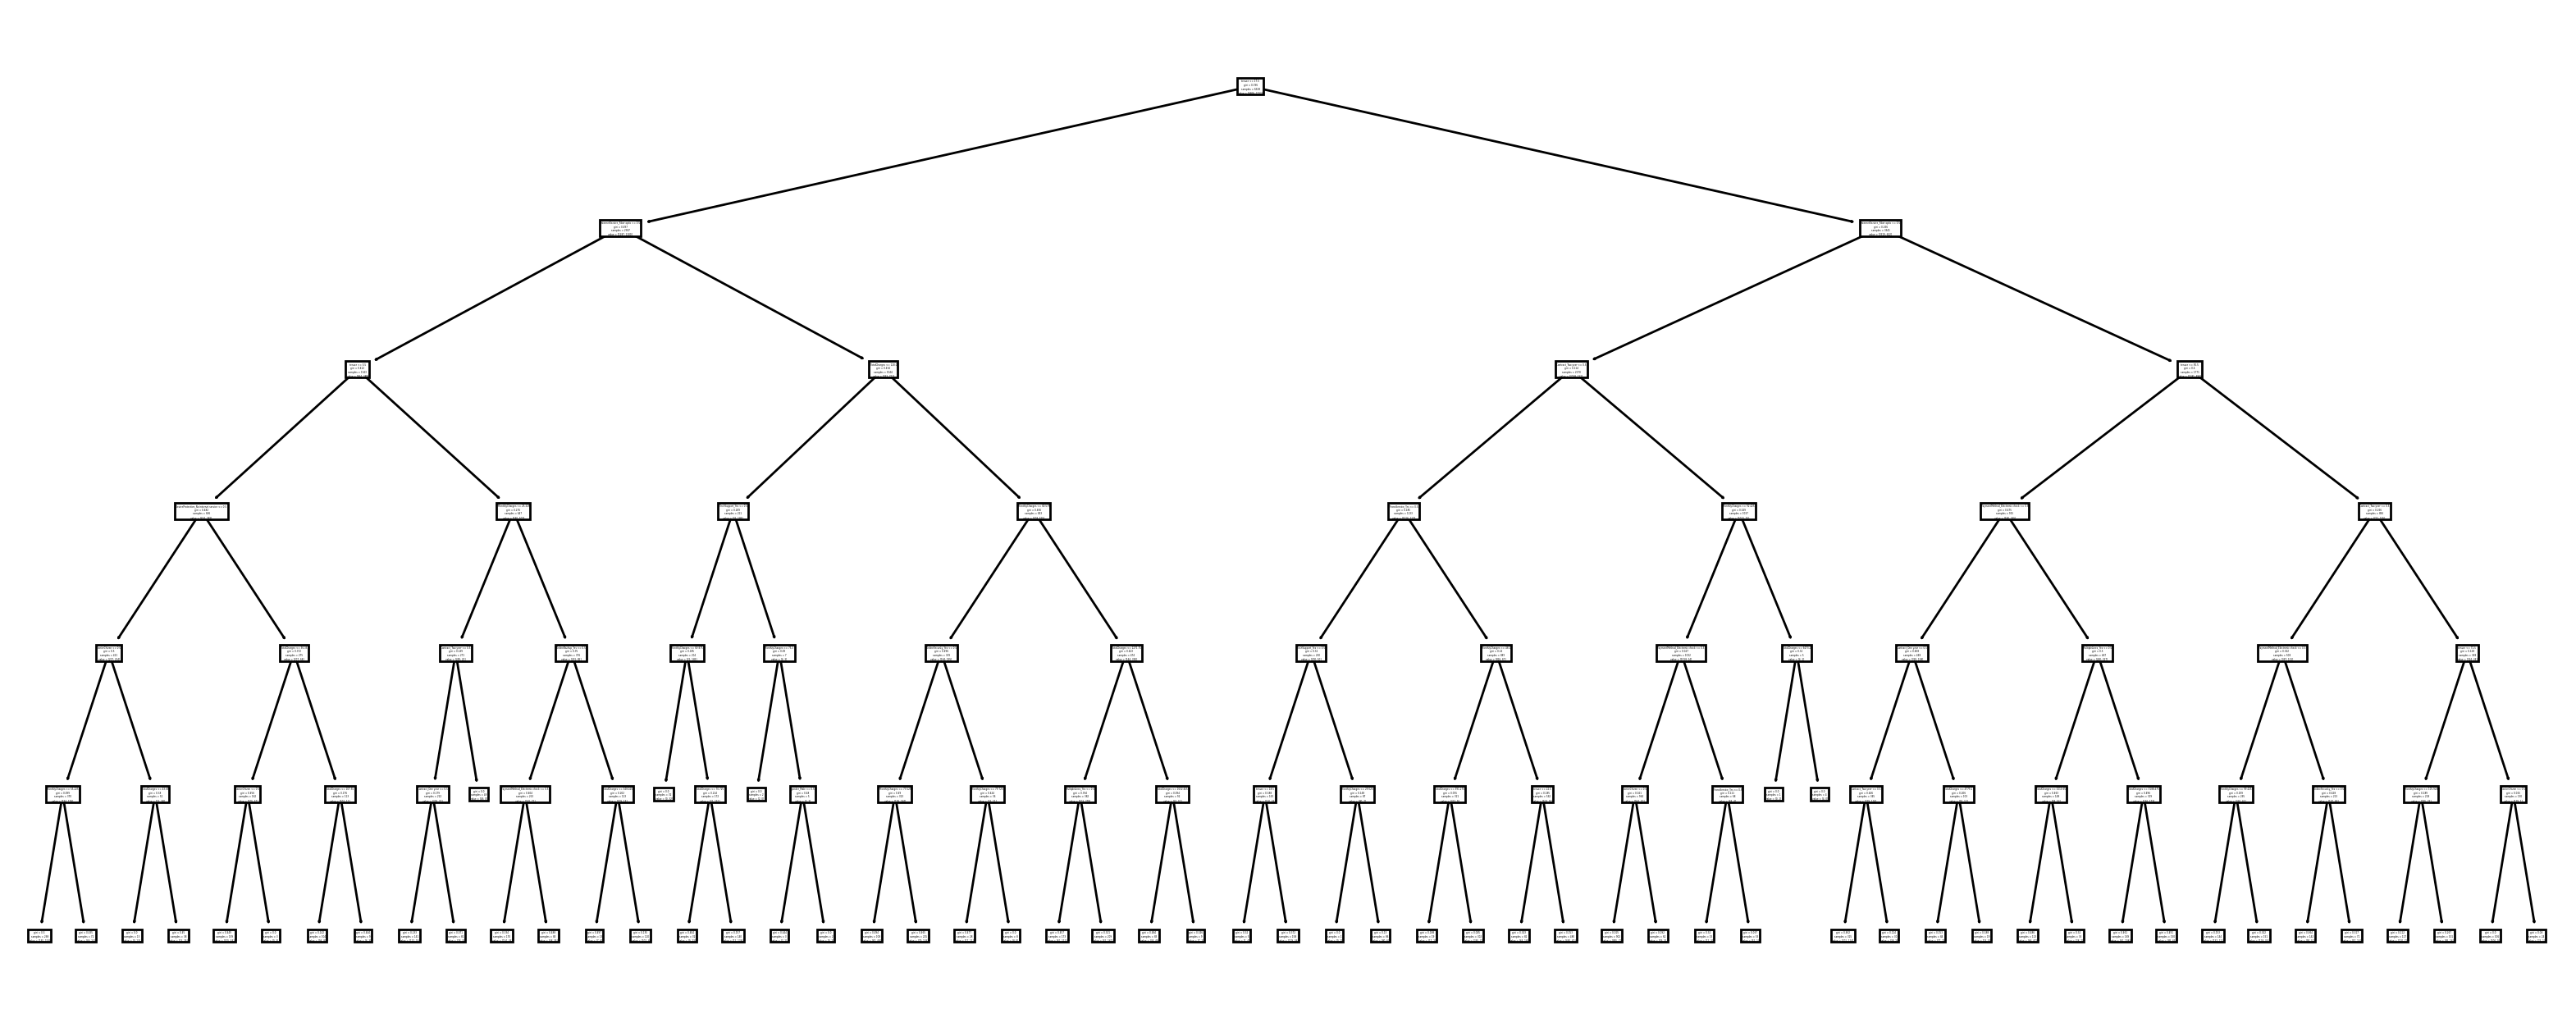

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8),dpi=200)
plot_tree(tree, feature_names=X.columns);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [99]:
from sklearn.ensemble import RandomForestClassifier #first GO TO as benchmark

#model 1 RF
rf = RandomForestClassifier() 
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)

rf_balanced = RandomForestClassifier(class_weight='balanced') 
rf_balanced.fit(X_train,y_train)
pred_rf_balanced=rf_balanced.predict(X_test)

In [100]:
#model 2 CV
rf_param_grid = {
              'max_depth':[5,6],
              'max_leaf_nodes':[4,5,6,7],
              'n_estimators':[40,50,60]
             }

grid_rf=GridSearchCV(rf_balanced,rf_param_grid)
grid_rf.fit(X_train,y_train)
pred_rf_cv=grid_rf.predict(X_test)

In [96]:
grid_rf.best_params_

{'max_depth': 5, 'max_leaf_nodes': 7, 'n_estimators': 40}

In [102]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



In [103]:
print(classification_report(y_test,pred_rf_balanced))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.53      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.80       704



In [104]:
print(classification_report(y_test,pred_rf_cv))

              precision    recall  f1-score   support

          No       0.92      0.72      0.81       557
         Yes       0.42      0.76      0.54       147

    accuracy                           0.73       704
   macro avg       0.67      0.74      0.67       704
weighted avg       0.81      0.73      0.75       704



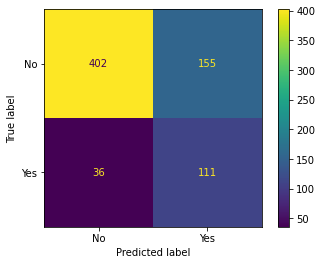

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf_cv)

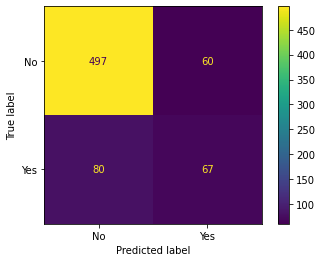

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf_balanced)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [79]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada=AdaBoostClassifier()
grb=GradientBoostingClassifier()
ada.fit(X_train,y_train)
grb.fit(X_train,y_train)

GradientBoostingClassifier()

In [80]:
pred_ada = ada.predict(X_test)
pred_grn = grb.predict(X_test)

In [81]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [82]:
print(classification_report(y_test,pred_grn))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



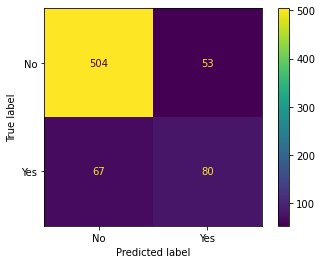

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_ada)

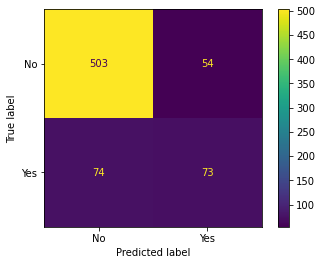

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_grn)

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!